In [1]:
import sys
sys.path.append('../Codes/Kitas_Schools')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
from matplotlib.lines import Line2D
from datetime import datetime, timedelta
import scipy.special as sc
import os.path
import pickle
from matplotlib import style
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from IPython.display import display, Math
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter

def my_linear_func(x, a, b):
    return a + b*x
def my_quadratic_func(x, a, b, c):
    return np.log(a)+np.log(np.sqrt(-b)) + b*(x-c)**2

Text_files_path = '../../../../../Dropbox/Research/Epidemiology_2020/Text_files/Kitas_Schools/'
print(style.available)
#style.use('seaborn-paper')
%autosave 60

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Autosaving every 60 seconds


In [2]:
def my_plot_layout(ax, yscale = 'linear', xscale = 'linear', ticks_labelsize = 24,
                   xlabel = '', ylabel = '', title = '', x_fontsize=24, y_fontsize = 24,
                   t_fontsize = 24):
    ax.tick_params(labelsize = ticks_labelsize)
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)
    ax.set_xlabel(xlabel, fontsize = x_fontsize)
    ax.set_ylabel(ylabel, fontsize = y_fontsize)
    ax.set_title(title, fontsize = y_fontsize)

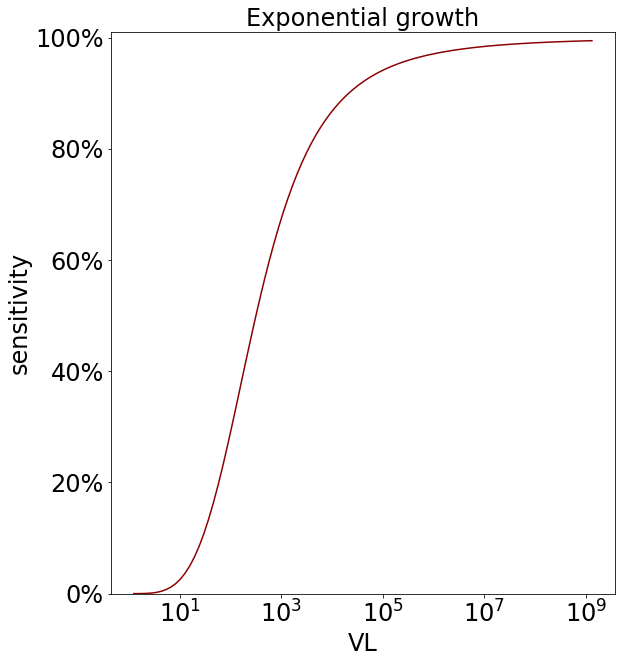

In [3]:
g = 3
time = np.linspace(0, 7, 100)
virus = np.exp(g * time)
sensitivity = (1/(1+(np.log10(virus[1:])/(2.5))**(-4)))
t_inc = 5
tau = 1
fig, ax  = plt.subplots(figsize = (10,10), gridspec_kw={'bottom':0.1, 'left':0.2})
ax.plot(virus[1:], sensitivity, color = 'darkred')
#ax.fill_between(time[1:], 1e4*(1/(1+(time[1:]/5)**(-6))), np.ones_like(time[1:])*1, alpha = .8)
#ax.vlines([t_inc, t_inc-tau], 1, [np.exp(g * t_inc), np.exp(g * (t_inc-tau))], linestyle = '--', color = ['grey', 'darkgrey'])
#ax.hlines([np.exp(g * t_inc), np.exp(g * (t_inc-tau))], 0, [t_inc, t_inc-tau], linestyle = '--', color = ['grey', 'darkgrey'])
ax.set_ylim(0, 1.01)
my_plot_layout(ax, xscale = 'log', yscale = 'linear', xlabel = 'VL', ylabel = 'sensitivity',
              title = 'Exponential growth')
ax.yaxis.set_major_formatter(PercentFormatter(1))
fig.savefig('../../Figures/Kitas_Schools/sensitivity_fit.pdf')



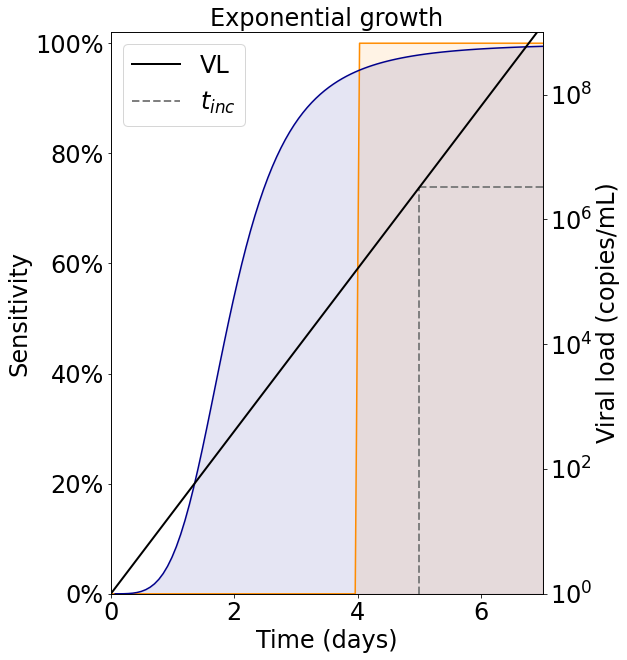

In [4]:
fig, ax  = plt.subplots(figsize = (10,10), gridspec_kw={'bottom':0.1, 'left':0.2, 'right':.8})

ax.plot(time, np.heaviside(time - (t_inc-tau), 0), color = 'darkorange')
ax.plot(time[1:], sensitivity , color = 'darkblue')
ax.fill_between(time, np.heaviside(time - (t_inc-tau), 0), 0, alpha = .1, color = 'darkorange')
ax.fill_between(time[1:], sensitivity, 0, alpha = .1, color = 'darkblue')
ax.set_ylim(0, 1.02)
ax.set_xlim(0, 7)
my_plot_layout(ax, ylabel = 'Sensitivity', xlabel = 'Time (days)')
ax.yaxis.set_major_formatter(PercentFormatter(1))

ax2 = ax.twinx() 
ax2.plot(time, virus, color = 'k', linewidth = 2, label = 'VL')
ax2.vlines([t_inc], 1, [np.exp(g * t_inc),], linestyle = '--', color = ['grey', 'darkgrey'], linewidth = 2, label = '$t_{inc}$')
ax2.hlines([np.exp(g * t_inc)], [t_inc], 7, linestyle = '--', color = ['grey', 'darkgrey'], linewidth = 2)
ax2.set_ylim(1, 1e9)
ax2.legend(fontsize = 24)
my_plot_layout(ax2, yscale = 'log',  xlabel = 'Time', ylabel = 'Viral load (copies/mL)',
              title = 'Exponential growth')

fig.savefig('../../Figures/Kitas_Schools/sensitivity.pdf')



In [5]:
data = pd.read_excel('../../../../../Dropbox/Research/Epidemiology_2020/Text_files/Kitas_Schools/data/Sensitivität.xlsx', header = 1)
data


,from,until,swab,saliva,Sensitivity,swab.1,saliva.1,Sensitivity.1,Unnamed: 8,Unnamed: 9
0,1000000000,10000000000,0,0,NaN,3,3,100.000000,NaN,NaN
1,100000000,1000000000,1,1,100.000000,8,7,87.500000,NaN,99.0
2,10000000,100000000,8,8,100.000000,17,15,88.235294,NaN,96.0
3,1000000,10000000,16,16,100.000000,21,16,76.190476,NaN,96.0
4,100000,1000000,23,22,95.652174,38,29,76.315789,NaN,82.0
5,10000,100000,17,16,94.117647,31,21,67.741935,NaN,56.0
6,1000,10000,17,14,82.352941,26,9,34.615385,NaN,0.0
7,100,1000,25,14,56.000000,5,1,20.000000,NaN,NaN
8,10,100,6,3,50.000000,2,0,0.000000,NaN,NaN
9,1,10,4,0,0.000000,2,0,0.000000,NaN,NaN


5.0415412289783685e-09 [ 3.14401914 -2.54807965] [ 8.08559008 -6.02927411]


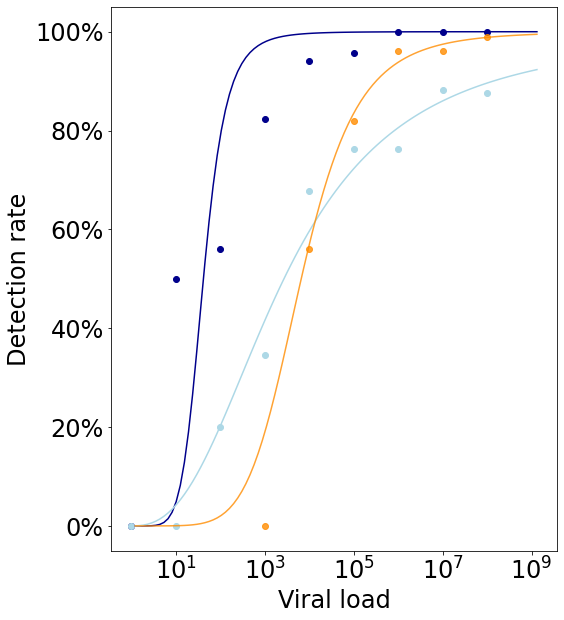

In [6]:
fig, ax = plt.subplots(figsize = (8, 10))
ax.plot(data['from'][1:], data['Sensitivity'][1:]/100, marker = 'o', linestyle = '', color = 'darkblue')
ax.plot(data['from'][1:], data['Sensitivity.1'][1:]/100, marker = 'o', linestyle = '', color = 'lightblue')
ax.plot(data['from'][1:-3], data['Unnamed: 9'][1:-3]/100, marker = 'o', linestyle = '', color = 'darkorange', alpha = .8)


popt, pcov = curve_fit(my_linear_func, xdata=np.log(np.log10(data['from'][1:-1])), ydata=np.log((1/((data['Sensitivity'][1:-1]-0.001)/100.0))-1), p0 = (1, -4))
popt2, pcov2 = curve_fit(my_linear_func, xdata=np.log(np.log10(data['from'][1:-2])), ydata=np.log((1/((data['Sensitivity.1'][1:-2]-0.001)/100.0))-1), p0 = (1, -4))
popt3, pcov3 = curve_fit(my_linear_func, xdata=np.log(np.log10(data['from'][1:-4])), ydata=np.log((1/((data['Unnamed: 9'][1:-4]-0.001)/100.0))-1), p0 = (1, -4))


print(np.exp(popt[0])**(popt[1]), popt2, popt3)
ax.plot(virus[1:], 1/(np.exp(my_linear_func(np.log(np.log10(virus[1:])), *popt))+1), color = 'darkblue')
ax.plot(virus[1:], 1/(np.exp(my_linear_func(np.log(np.log10(virus[1:])), *popt2))+1), color = 'lightblue')
ax.plot(virus[1:], 1/(np.exp(my_linear_func(np.log(np.log10(virus[1:])), *popt3))+1), color = 'darkorange', alpha = .8)



my_plot_layout(ax, xscale = 'log', xlabel = 'Viral load', ylabel = 'Detection rate')
ax.yaxis.set_major_formatter(PercentFormatter(1))